### Lab2 Task 1

Результат без PCA
Точність (Accuracy): 0.5333
Час навчання/прогнозу: 0.005000 сек

Результат з PCA
Точність (Accuracy): 0.5506
Час навчання/прогнозу: 0.002540 сек


t-SNE


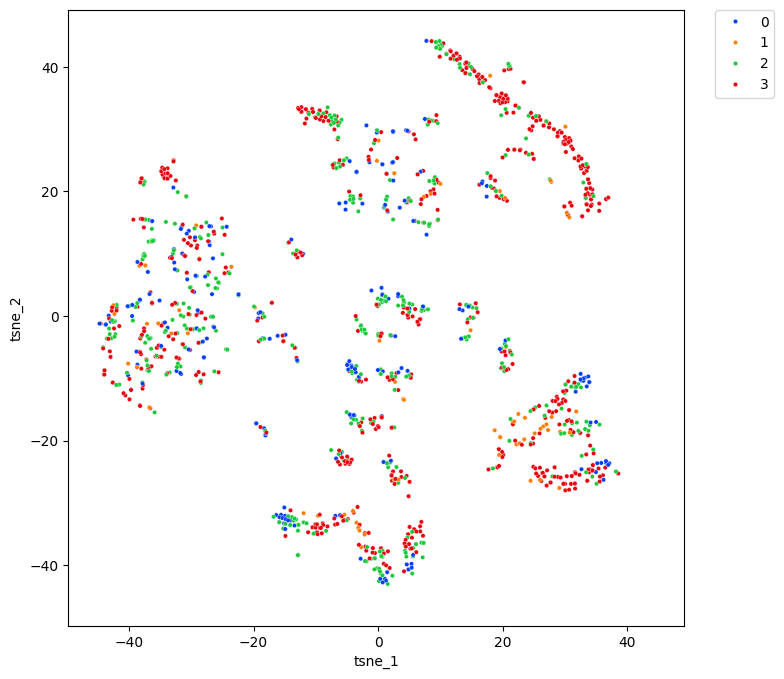

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("../data/cyber_salaries.csv")

target_col = 'experience_level'

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=[target_col])
y = df[target_col]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Без PCA
print("Результат без PCA")
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
time_no_pca = time.time() - start_time

acc_no_pca = accuracy_score(y_test, y_pred)
print(f"Точність (Accuracy): {acc_no_pca:.4f}")
print(f"Час навчання/прогнозу: {time_no_pca:.6f} сек\n")


# PCA(0.95)
print("Результат з PCA")
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
time_pca = time.time() - start_time

acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Точність (Accuracy): {acc_pca:.4f}")
print(f"Час навчання/прогнозу: {time_pca:.6f} сек")


# t-SNE
print("\n\nt-SNE")
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X_scaled)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots(1, figsize=(8, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=10, palette='bright')

lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

## Висновки

Використання PCA пришвидшило роботу алгоритку knn в 2 рази, також трохи покращилась точність класифікації. Це свідчить про те що в датасеті було багато "шуму" який погіршував результат.

Стосовно t-SNE. Отриманий графік добре пояснює, чому загальна точність моделі залишається на рівні 55%. На зображенні видно, що точки різних класів сильно перемішані й не утворюють чітких ізольованих груп. Це означає, що об'єкти в датасеті дуже схожі між собою за характеристиками, тому класифікатору важко провести чіткі межі між різними рівнями досвіду.